In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [22]:
import pandas as pd
import numpy as np
import os
from os.path import join

In [7]:
#%run ../axuv_color_map.py
%run ../axuv_for_graphtec_for82.py

# Setup folders and file names

In [23]:
basedir = '../../data'
ld = os.listdir(basedir)
lda = [i for i in ld if i.startswith('AXUV')]
print(lda)
fname = lda[0]

['AXUV_40416.CSV']


# Load Data with read_csv

In [83]:
colind = ['No','Date','Time','us']
colch  = [f'CH{i}' for i in range(1,17)]
colnan = [f'nan{i}' for i in range(1,32-4-15)]
columns = colind + colch + colnan

In [108]:
data = pd.read_csv(join(basedir,fname),encoding = 'cp932',skiprows = 46,names = columns)
data = data.drop(columns = colnan)
t = np.linspace(0,data.shape[0]*(data['us'][1]-data['us'][0])*1e-6,data.shape[0])
data.head()

,No,Date,Time,us,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,CH10,CH11,CH12,CH13,CH14,CH15,CH16
0,1,2019-08-29,18:56:17,0,-0.003,-0.001,0.000,-0.003,-0.001,-0.004,-0.002,-0.003,-0.003,-0.003,-0.003,0.001,-0.001,0.000,-0.657,0.001
1,2,2019-08-29,18:56:17,20,0.001,-0.001,-0.004,-0.002,-0.001,-0.004,-0.002,-0.001,-0.001,-0.003,-0.001,0.000,-0.004,-0.001,-0.657,0.002
2,3,2019-08-29,18:56:17,40,0.001,-0.004,-0.005,-0.001,-0.002,-0.004,0.000,-0.002,-0.002,-0.003,0.000,-0.001,0.001,-0.001,-0.660,0.003
3,4,2019-08-29,18:56:17,60,0.001,-0.004,-0.004,-0.002,-0.004,-0.003,-0.001,-0.002,-0.002,-0.005,-0.001,-0.004,-0.003,-0.001,-0.661,0.005
4,5,2019-08-29,18:56:17,80,0.001,-0.001,-0.003,-0.004,-0.004,-0.002,-0.002,-0.003,-0.003,-0.001,-0.002,-0.002,-0.002,-0.001,-0.657,-0.002


In [124]:
print(colnan)

['nan1', 'nan2', 'nan3', 'nan4', 'nan5', 'nan6', 'nan7', 'nan8', 'nan9', 'nan10', 'nan11', 'nan12']


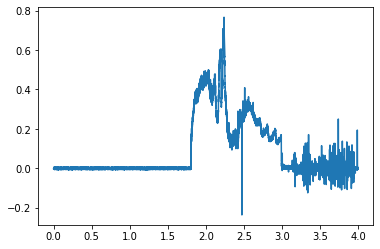

In [111]:
plot(t,data['CH7'])

# Get info from the header

In [123]:
with open(join(basedir,fname),'r',encoding='cp932') as f:
    for i in range(47):
        line = f.readline()
        print(i,'\t',line.strip())
        if i == 44:
            names = line.strip().split(',')
            print(len(names))
            namesch = [i for i in names if 'CH' in i]
            print(len(namesch))

0 	 ベンダ,GRAPHTEC Corporation
1 	 モデル,"GL7000"
2 	 バージョン,"Ver2.00"
3 	 MaxCH,90
4 	 LogicCH,0
5 	 PulseCH,0
6 	 MaxUnit,9
7 	 UnitOrder,HSV,HSV,HSV,HSV,HSV,HSV,HSV,HSV,HSV
8 	 UnitLP,Off,Off,Off,Off,Off,Off,Off,Off,Off
9 	 測定間隔,20us
10 	 測定点数,200000
11 	 トリガ点,0
12 	 開始時刻,2019-08-29,18:55:08
13 	 終了時刻,2019-08-29,18:56:21
14 	 トリガ時刻,2019-08-29,18:56:17
15 	 アンプ設定
16 	 CH,信号名,アンプ,入力,レンジ,フィルタ,スパン上限,スパン下限,単位,線色,,,線幅,スケーリング機能,入力側上限値,入力側下限値,出力側上限値,出力側下限値,単位
17 	 CHU1-1,"CH1",HSV,DC,10V,50KHz,+5.000,-5.000, V,28,5,6,0
18 	 CHU1-2,"CH2",HSV,DC,5V,50KHz,+2.500,-2.500, V,0,13,23,0
19 	 CHU1-3,"CH3",HSV,DC,5V,50KHz,+2.500,-2.500, V,9,22,8,0
20 	 CHU1-4,"CH4",HSV,DC,5V,50KHz,+2.500,-2.500, V,21,0,21,0
21 	 CHU2-1," CH2-1",HSV,DC,5V,50KHz,+2.500,-2.500, V,28,5,6,0
22 	 CHU2-2," CH2-2",HSV,DC,5V,50KHz,+2.500,-2.500, V,0,13,23,0
23 	 CHU2-3," CH2-3",HSV,DC,5V,50KHz,+2.500,-2.500, V,9,22,8,0
24 	 CHU2-4," CH2-4",HSV,DC,5V,50KHz,+2.500,-2.500, V,21,0,21,0
25 	 CHU3-1," CH3-1",HSV,DC,5V,50KHz,+2.500,-2.50